# **Import Library**

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# **Data Read**

In [9]:
file = pd.read_csv('Shoes_Data.csv')
file

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


In [10]:
df = file[["reviews", "reviews_rating"]]
df.head()

,reviews,reviews_rating
0,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...
1,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...
2,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...
3,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...
4,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...


# **Data Preparation**

In [11]:
rew  = []
rat = []

for j in df.index:
    lst = [i for i in df.iloc[j].reviews.split('||')]
    for k in lst:
        rew.append(k)
        
for j in df.index:
    lst = [i for i in df.iloc[j].reviews_rating.split('||')]
    for k in lst:
        rat.append(k)
        
df = pd.DataFrame(list(zip(rew, rat)),
               columns =['Review', 'Review_rating'])

In [12]:
df.head()

,Review,Review_rating
0,Not happy with product,1.0 out of 5 stars
1,It's not as expected.,1.0 out of 5 stars
2,AVERAGE PRODUCT,3.0 out of 5 stars
3,Pic more beautiful,3.0 out of 5 stars
4,Got damage product. But quality is average fo...,3.0 out of 5 stars


In [13]:
# Getting all unique symbols in text
all_text = str()
for sentence in df['Review'].values:
    all_text += sentence
    
''.join(set(all_text))


'Q🏃gतy9nर😔😐ा👟3🤨🤫😎!😍TB\'eु👍😡😋हiWß🙄😒🙂😄चद😘☑⭐खआ»😢व️ईE🌹sl😂🔥🤑w🇳Lள❣उ✌"छPब😤4⇢😅d0%💸🤟ोन☹अ🇪😁💰ं(₹ी👇C’डO1😊&@👞/k💖8❤F)vझ🏼பG इ😭ॉ💕7q:V🥰p👎😇|♂தज.MS🤣Rप6_िXar🇨कj💪J😑यடfzैo…🤘Dm😶😞्x😠😉5🥾ूटK✊गNுल🇮A😟✔।स🌟🤎=😃🦶💋hे🤙U«c💯ढ?👌Z❌uI2🤮🏻b👏Y🖤H📦#☺💥t😌*ி+-்\u200d💚म😀🤩'

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Set of stopwords to remove
stop = set(stop)

# Set of punctuation signs to remove
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
import re

def lower(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

# Removing all words with digits and standalone digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
        
# One function to clean it all
def clean_text(text):
    text = lower(text)
    text = remove_punctuation(text)
    #text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_emoji(text)
    text = remove_non_printable(text)
    return text

In [16]:
# Returns first digit entry in a string
def get_first_digit(text):
    match = re.search(r'\d', text)
    return match[0]

In [17]:
df['Review_rating']=df['Review_rating'].apply(get_first_digit)
df['clean_review']=df['Review'].apply(clean_text)
df.head()

,Review,Review_rating,clean_review
0,Not happy with product,1,not happy with product
1,It's not as expected.,1,its not as expected
2,AVERAGE PRODUCT,3,average product
3,Pic more beautiful,3,pic more beautiful
4,Got damage product. But quality is average fo...,3,got damage product but quality is average for


In [18]:
all_text_clean = str()
for sentence in df['clean_review'].values:
    all_text_clean += sentence
''.join(set(all_text_clean))

'pgyndhcarejufizbomktvxsl wq'

In [19]:
df["clean_review"].value_counts()

 verified purchase                                         647
 report abuse                                              418
 good                                                      280
 good product                                              151
 nice                                                      118
                                                          ... 
 shoes shape after use becomes different lyk as if its       1
 this product is  original                                   1
 size charts misleading                                      1
 dont buy this product                                       1
 overall its ok                                              1
Name: clean_review, Length: 4711, dtype: int64

In [20]:
df = df[~df.Review.str.contains("Report abuse")]
df = df[~df.Review.str.contains("Verified")]

In [21]:
df["clean_review"].value_counts()

 good                                                      280
 good product                                              151
 nice                                                      118
 value for money                                            94
 nice product                                               64
                                                          ... 
 good shoe will use till it lasts                            1
 size number is same but actual fitting is different         1
 shoes shape after use becomes different lyk as if its       1
 this product is  original                                   1
 overall its ok                                              1
Name: clean_review, Length: 4706, dtype: int64

# **Word Clouds**

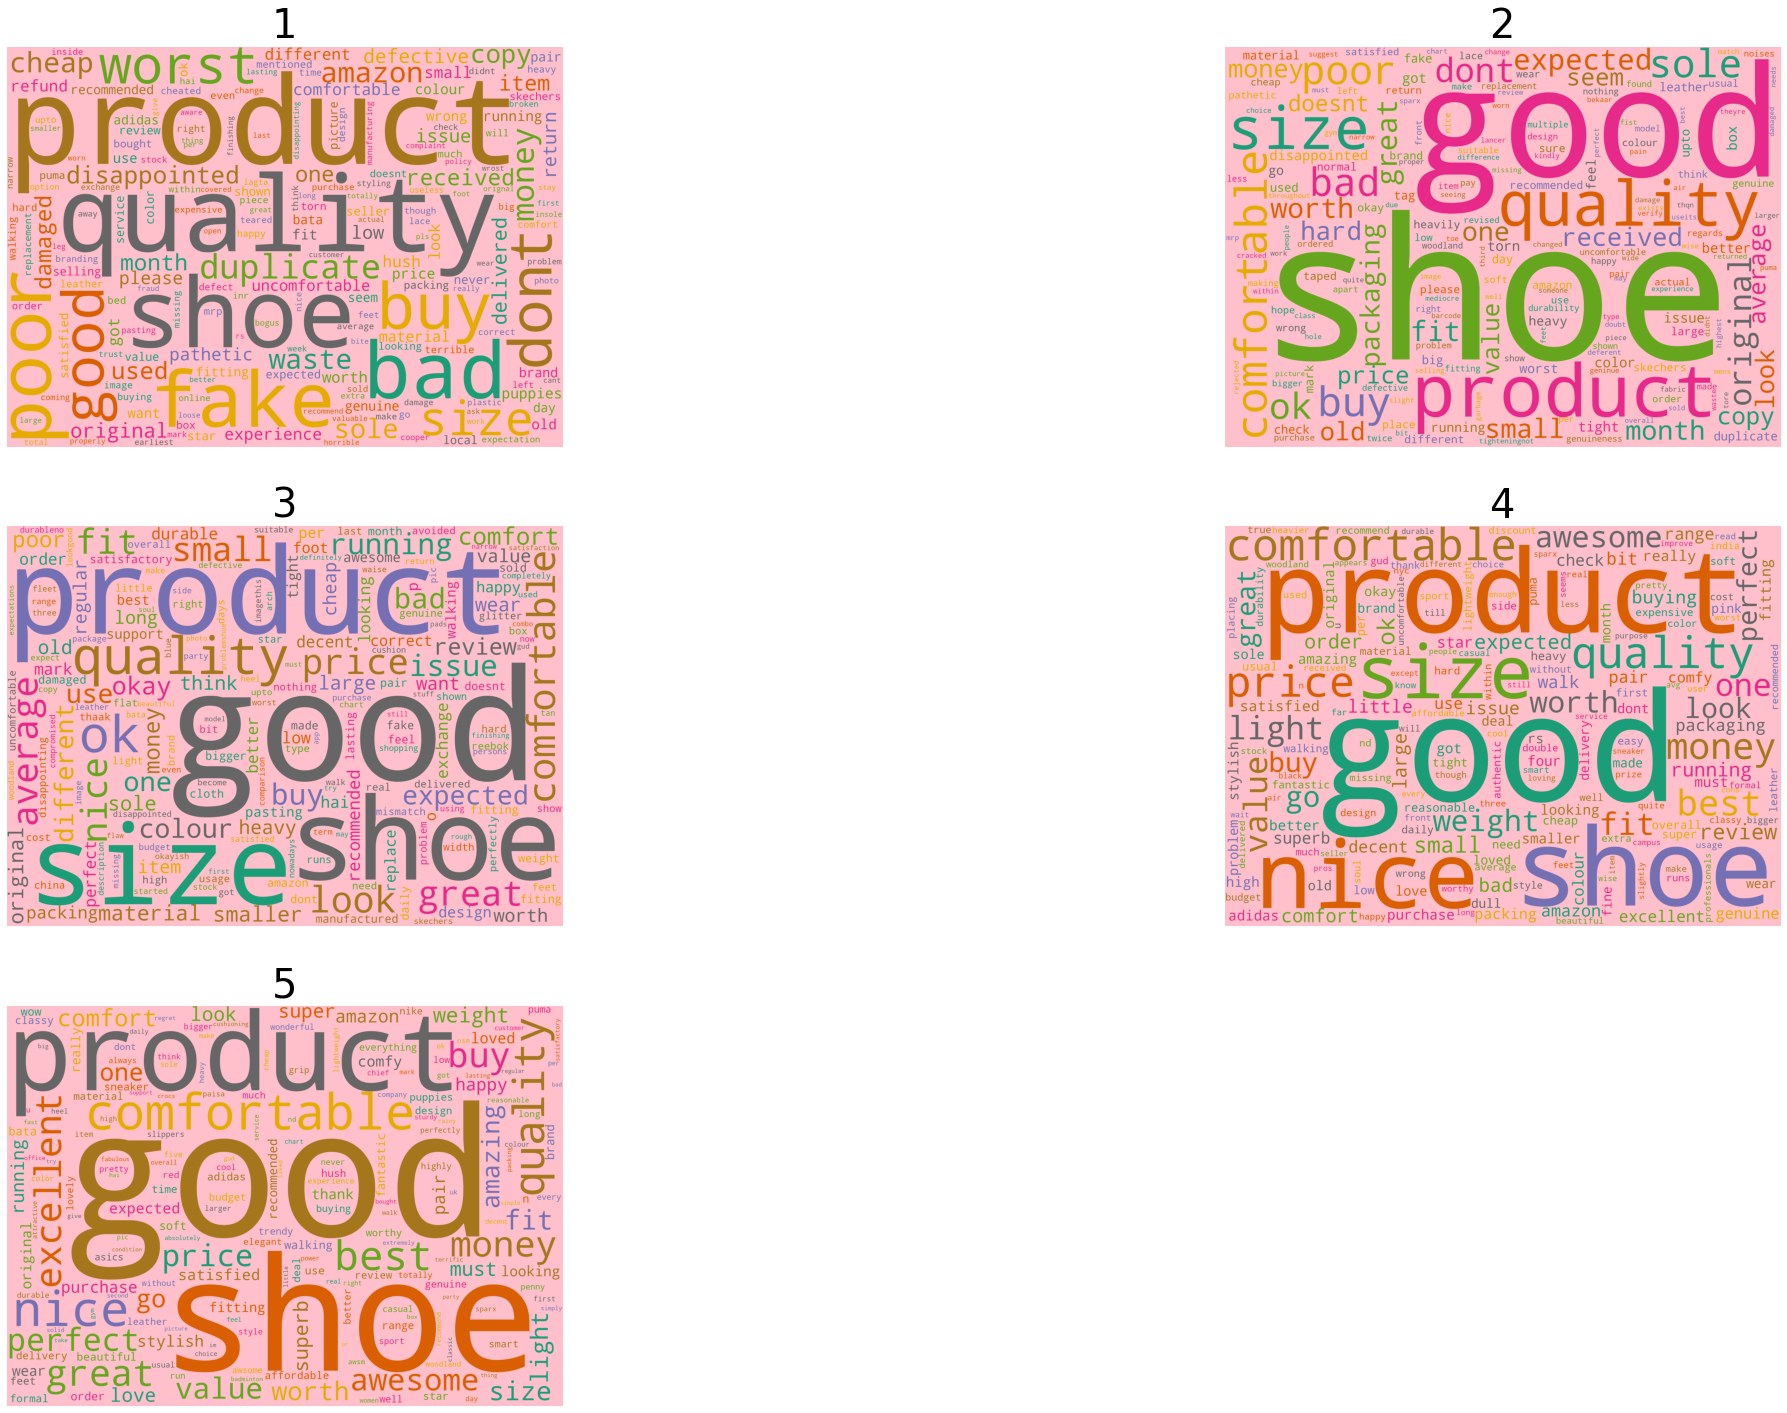

In [22]:
from wordcloud import WordCloud

plt.figure(figsize=(40,25))

subset1 = df[df['Review_rating']=='1']
text = subset1.clean_review.values
cloud1=WordCloud(background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 1)
plt.axis('off')
plt.title("1",fontsize=40)
plt.imshow(cloud1)

subset2 = df[df['Review_rating']=='2']
text = subset2.clean_review.values
cloud2=WordCloud(background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 2)
plt.axis('off')
plt.title("2",fontsize=40)
plt.imshow(cloud2)

subset3 = df[df['Review_rating']=='3']
text = subset3.clean_review.values
cloud3=WordCloud(background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 3)
plt.axis('off')
plt.title("3",fontsize=40)
plt.imshow(cloud3)

subset4 = df[df['Review_rating']=='4']
text = subset4.clean_review.values
cloud4=WordCloud(background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 4)
plt.axis('off')
plt.title("4",fontsize=40)
plt.imshow(cloud4)

subset5 = df[df['Review_rating']=='5']
text = subset5.clean_review.values
cloud5=WordCloud(background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(3, 2, 5)
plt.axis('off')
plt.title("5",fontsize=40)
plt.imshow(cloud5)

# **Sentiment Analysis**

In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiments = []

for sentence in df['clean_review'].values:
    sentiments.append(max(sia.polarity_scores(sentence), key=sia.polarity_scores(sentence).get))

In [25]:
df["sentiment"] = sentiments
df.head()

,Review,Review_rating,clean_review,sentiment
0,Not happy with product,1,not happy with product,neg
1,It's not as expected.,1,its not as expected,neu
2,AVERAGE PRODUCT,3,average product,neu
3,Pic more beautiful,3,pic more beautiful,pos
4,Got damage product. But quality is average fo...,3,got damage product but quality is average for,neu


In [26]:
df["sentiment"] = sentiments
df.head()

,Review,Review_rating,clean_review,sentiment
0,Not happy with product,1,not happy with product,neg
1,It's not as expected.,1,its not as expected,neu
2,AVERAGE PRODUCT,3,average product,neu
3,Pic more beautiful,3,pic more beautiful,pos
4,Got damage product. But quality is average fo...,3,got damage product but quality is average for,neu


# **EDA**

In [27]:
count = df[['Review_rating', 'sentiment']].value_counts().to_frame().reset_index()
count.columns.values[2] = "count"

import plotly.express as px

fig = px.bar(count, x="Review_rating", y="count", color="sentiment", text="sentiment")
fig.update_layout(title_text='Review rating/detected sentiments',  title_x=0.5)
fig.show()

In [28]:
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [29]:
df['review_len'] = df['clean_review'].astype(str).apply(len)
df['review_word_count'] = df['clean_review'].apply(lambda x: len(str(x).split()))

In [30]:
one = df[df['Review_rating']=='1']
two = df[df['Review_rating']=='2']
three = df[df['Review_rating']=='3']
four = df[df['Review_rating']=='4']
five = df[df['Review_rating']=='5']

In [31]:
trace0 = go.Box(
    y=one['review_len'],
    name = 'One star',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=two['review_len'],
    name = 'Two stars',
    marker = dict(
        color = 'green',
    )
)

trace2 = go.Box(
    y=three['review_len'],
    name = 'Three stars',
    marker = dict(
        color = 'orange',
    )
)

trace3 = go.Box(
    y=four['review_len'],
    name = 'Four stars',
    marker = dict(
        color = 'blue',
    )
)

trace4 = go.Box(
    y=five['review_len'],
    name = 'Five stars',
    marker = dict(
        color = 'purple',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Length of the reviews", title_x=0.5,
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)


In [32]:
trace0 = go.Box(
    y=one['review_word_count'],
    name = 'One star',
    marker = dict(
        color = 'red',
    )
)

trace1 = go.Box(
    y=two['review_word_count'],
    name = 'Two stars',
    marker = dict(
        color = 'blue',
    )
)

trace2 = go.Box(
    y=three['review_word_count'],
    name = 'Three stars',
    marker = dict(
        color = 'darksalmon',
    )
)

trace3 = go.Box(
    y=four['review_word_count'],
    name = 'Four stars',
    marker = dict(
        color = 'purple',
    )
)

trace4 = go.Box(
    y=five['review_word_count'],
    name = 'Five stars',
    marker = dict(
        color = 'green',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Word count of the reviews", title_x=0.5,
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)


In [33]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
pos_unigrams = get_top_n_gram(five['clean_review'],(1,1),10)
neg_unigrams = get_top_n_gram(one['clean_review'],(1,1),10)


df1 = pd.DataFrame(pos_unigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='green', title='Top 10 Unigrams in positve text',orientation='h')

df2 = pd.DataFrame(neg_unigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='red',title='Top 10 Unigrams in negative text',orientation='h')

In [35]:
pos_bigrams = get_top_n_gram(five['clean_review'],(2,2),10)
neg_bigrams = get_top_n_gram(one['clean_review'],(2,2),10)


df1 = pd.DataFrame(pos_bigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='green', title='Top 10 Bigrams in positve text',orientation='h')

df2 = pd.DataFrame(neg_bigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).iplot(
    kind='bar', yTitle='Count', linecolor='black', color='red',title='Top 10 Bigrams in negative text',orientation='h')

In [36]:
df.head()

,Review,Review_rating,clean_review,sentiment,review_len,review_word_count
0,Not happy with product,1,not happy with product,neg,22,4
1,It's not as expected.,1,its not as expected,neu,20,4
2,AVERAGE PRODUCT,3,average product,neu,16,2
3,Pic more beautiful,3,pic more beautiful,pos,19,3
4,Got damage product. But quality is average fo...,3,got damage product but quality is average for,neu,47,8


Source link: 🔗 https://www.kaggle.com/lizakonopelko/shoes-reviews-eda-sentiment-analysis#-EDA- 🔗